In [314]:
%matplotlib notebook

from modsim import *

In [315]:
m = UNITS.meters
s = UNITS.seconds

In [316]:
import random

In [317]:
condition = Condition(floorheight = 3 *m,
                     num_floors = 1,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)

In [318]:
# 18 seconds for elevator to start, 9 to stop, 13 between floors

In [319]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [320]:
find_magic_num(condition.v_max, condition.a_max)

<Quantity(1.3399476923076923, 'meter')>

In [321]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0 * m, vy = 0 * m / s)
    ts = linspace(0,45,10000)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [322]:
system = make_system(condition)
system.finished

False

In [323]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if(system.finished == True):
        return 0,0
    if(vy > v_max):
        ay = 0
        vy = v_max
    if(height < y):
        ay = -a_max
        #print(t)
        return vy, ay
    if(y>= height * .98):
        system.finished = True
        #print(t)
        system.end_time = t
    
    return vy,ay

In [324]:
run_odeint(system, slope_func)

<IPython.core.display.Javascript object>


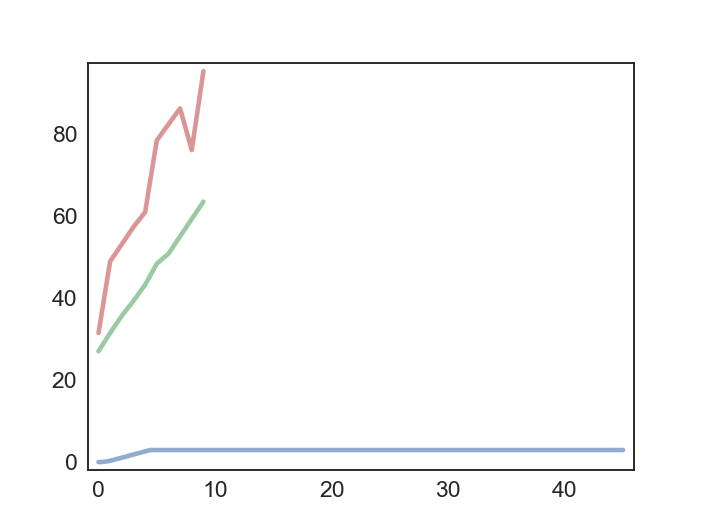

<Quantity(3, 'meter')>

In [325]:
plot(system.results.y)
system.height

In [326]:
floors = [0,1,2,3,4,10]

In [327]:
system.end_time

4.446052718314756

In [341]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += system.end_time + 13
    total_time += 14
    return total_time
        

In [342]:
def sweep_basic_floors(max):
    sweep = SweepSeries()
    for i in range(max):
        condition = Condition(floorheight = 3 *m,
                     num_floors = i,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i] = system.end_time + 27
    return sweep

In [343]:
sweep = sweep_basic_floors(10)

In [344]:
def sweep_3_people(max):
    sweep = SweepSeries()
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i] = multiple_floors(floors)
    return sweep

In [345]:
sweep2 = sweep_3_people(10)

In [346]:
print(sweep)

0    27.000000
1    31.446053
2    35.628705
3    39.256141
4    43.185864
5    48.324732
6    50.743023
7    54.975033
8    59.207042
9    63.439051
dtype: float64


In [355]:
def walking(max):
    sweep = SweepSeries()
    for i in range(max):
        sweep[i] = 18.75 * s
    return sweep

In [ ]:
sweep = sweep_basic_floors(10)
sweep2 = sweep_3_people(10)
sweep3 = walking(10)
plot(sweep)
plot(sweep2)

In [335]:
ep